In [1]:
#Importing Required Library
import pandas as pd
import seaborn as sns

In [2]:
#Reading excel file with skipping first row else we may get UNNAMMED heder
df = pd.read_excel("../input/Exercise Data.xlsx",skiprows=1)

In [3]:
df.head()

,Month,Contribution,Amount won by the bidder,Chit fund organizer commission,Net amount recd by Bid winner,Amount returned to everyone in the group
0,1,2000,40000,2500,37500,400
1,2,2000,42000,2500,39500,320
2,3,2000,45000,2500,42500,200
3,4,2000,48000,2500,45500,80
4,5,2000,40000,2500,37500,400


In [4]:
df.shape

(25, 6)

In [5]:
#Checking for presence of NULL Values and corresponding dtypes
data = pd.DataFrame(df.dtypes)
data.rename(columns={0:'Dtypes'},inplace=True)
data["Null Value"] = df.isnull().sum()
data["Count"] = df.count()
data

,Dtypes,Null Value,Count
Month,int64,0,25
Contribution,int64,0,25
Amount won by the bidder,int64,0,25
Chit fund organizer commission,int64,0,25
Net amount recd by Bid winner,int64,0,25
Amount returned to everyone in the group,int64,0,25


From the above DataFrame we can conclude that, 1. There are no Null values 2. Assigned with correct dtypes with 25 instances.

In [6]:
#Statistical calculation of each attributes
df.describe()

,Month,Contribution,Amount won by the bidder,Chit fund organizer commission,Net amount recd by Bid winner,Amount returned to everyone in the group
count,25.000000,25.0,25.000000,25.0,25.000000,25.000000
mean,13.000000,2000.0,43800.000000,2500.0,41300.000000,248.000000
std,7.359801,0.0,2857.738033,0.0,2857.738033,114.309521
min,1.000000,2000.0,40000.000000,2500.0,37500.000000,0.000000
25%,7.000000,2000.0,42000.000000,2500.0,39500.000000,200.000000
50%,13.000000,2000.0,43000.000000,2500.0,40500.000000,280.000000
75%,19.000000,2000.0,45000.000000,2500.0,42500.000000,320.000000
max,25.000000,2000.0,50000.000000,2500.0,47500.000000,400.000000


In [50]:
def skewness(x):
    return x.skew()

def kurtosis(y):
    return y.kurtosis()

print("Skewness in DataFrame:\n", skewness(df))
print("\nKurtosis in DataFrame:\n", kurtosis(df))

Skewness in DataFrame:
 Month                                       0.000000
Contribution                                0.000000
Amount won by the bidder                    0.463413
Chit fund organizer commission              0.000000
Net amount recd by Bid winner               0.463413
Amount returned to everyone in the group   -0.463413
Actual Contribution                         0.463413
Annualized Return                           0.463413
Return%                                     0.463413
dtype: float64

Kurtosis in DataFrame:
 Month                                      -1.2000
Contribution                                0.0000
Amount won by the bidder                   -0.6086
Chit fund organizer commission              0.0000
Net amount recd by Bid winner              -0.6086
Amount returned to everyone in the group   -0.6086
Actual Contribution                        -0.6086
Annualized Return                          -0.6086
Return%                                    -0.6086


The values for asymmetry and kurtosis between -2 and +2 are considered acceptable in order to prove normal univariate distribution, as of above the attributes re normally distributed.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f993bd494a8>,
      dtype=object)

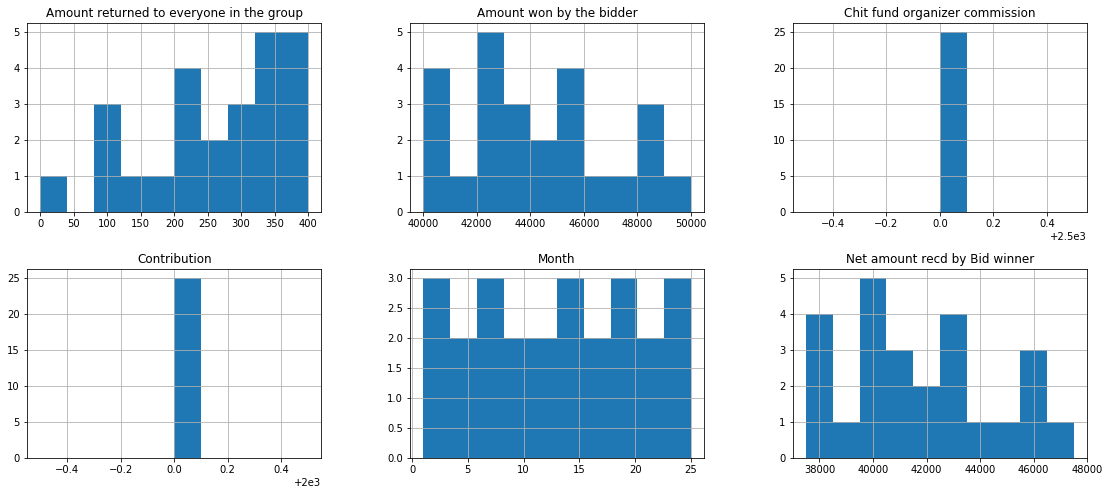

In [55]:
#The distribution of each attributes in dataset
numerical = ['Month', 'Contribution', 'Amount won by the bidder',
       'Chit fund organizer commission', 'Net amount recd by Bid winner',
       'Amount returned to everyone in the group']

df[numerical].hist(figsize=(19,8),layout=(2,3))

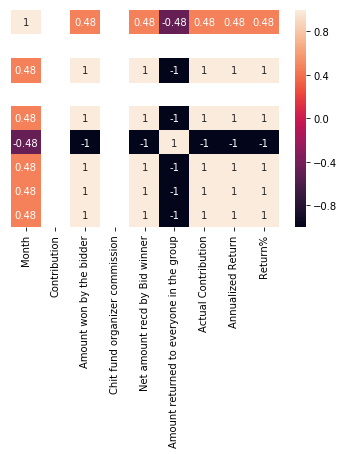

In [17]:
sns.heatmap(df.corr(),yticklabels=False,annot=True)

As per ChitFund mechanism, 25 people(in this dataset) has been contributing some amount each month for the period of 25 months. Each month lowest bidder will get the amount, the organizer commission will be reduced before the bidder gets his/her final amount. The same process will be followed for 25 months but the person who gets the amount should not take part in further bidding. 

By that, I am calculating contribution of individual aech month

In [7]:
df["Actual Contribution"] = df['Contribution'] - df["Amount returned to everyone in the group"]

Now let's see the total contribution throughout this period

In [8]:
total = df["Actual Contribution"].sum()
total

43800

Let's calculate bid winner amount of each month

In [9]:
df["Annualized Return"] = df["Net amount recd by Bid winner"] - total

In [10]:
df.head()

,Month,Contribution,Amount won by the bidder,Chit fund organizer commission,Net amount recd by Bid winner,Amount returned to everyone in the group,Actual Contribution,Annualized Return
0,1,2000,40000,2500,37500,400,1600,-6300
1,2,2000,42000,2500,39500,320,1680,-4300
2,3,2000,45000,2500,42500,200,1800,-1300
3,4,2000,48000,2500,45500,80,1920,1700
4,5,2000,40000,2500,37500,400,1600,-6300


Calculting Return% obtained by bid winners in every month

In [11]:
df["Return%"] = (df["Annualized Return"]/total) * 100

In [12]:
df.head()

,Month,Contribution,Amount won by the bidder,Chit fund organizer commission,Net amount recd by Bid winner,Amount returned to everyone in the group,Actual Contribution,Annualized Return,Return%
0,1,2000,40000,2500,37500,400,1600,-6300,-14.383562
1,2,2000,42000,2500,39500,320,1680,-4300,-9.817352
2,3,2000,45000,2500,42500,200,1800,-1300,-2.968037
3,4,2000,48000,2500,45500,80,1920,1700,3.881279
4,5,2000,40000,2500,37500,400,1600,-6300,-14.383562


1. What is the Annualized  Return of the person who bids in the last month ? 


In [13]:
((((1+(df["Return%"][24])/100)) ** (12/25)) - 1) * 100

3.969357358648673

2. What is the Annualized Return of the person who bids in the first month ?

In [14]:
((((1+(df["Return%"][0])/100)) ** (12/25)) - 1) * 100

-7.183019602665885

3. Write an R/Python script which calculates the annualized return of chit fund participant ?- Show the Return % for each month's bid winner.

In [15]:
df["Return%"]

0    -14.383562
1     -9.817352
2     -2.968037
3      3.881279
4    -14.383562
5     -9.817352
6     -7.534247
7     -5.251142
8    -14.383562
9     -9.817352
10    -2.968037
11     3.881279
12   -14.383562
13    -9.817352
14    -7.534247
15    -7.534247
16   -12.100457
17    -9.817352
18    -2.968037
19    -2.968037
20    -5.251142
21    -0.684932
22     1.598174
23     3.881279
24     8.447489
Name: Return%, dtype: float64

Let's plot the same

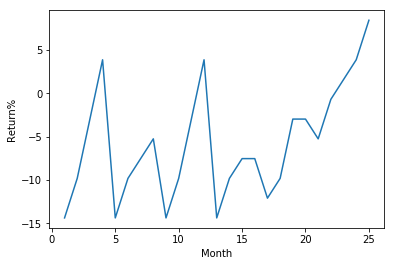

In [16]:
sns.lineplot(df["Month"],df["Return%"])

As month increases the Return percentage too increases

From above heatmap, all attributes are highly correlated with each other except month 